In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/var/folders/fj/25hghm0n7n33b98vlpmy81dm0000gn/T/ipykernel_54614/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_excel('data/alcools.xlsx', sheet_name='indiv actifs')


In [3]:
df.describe()

,MEOH,ACET,BU1,ISOP,MEPR,PRO1,ACAL
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,803.52500,221.033000,13.536000,95.130000,37.262000,374.16100,14.779000
std,365.78345,139.591235,9.908302,48.233995,21.010718,515.51154,11.430937
min,0.00000,13.000000,0.000000,0.000000,0.000000,23.00000,2.000000
25%,496.00000,123.750000,1.975000,69.500000,25.750000,71.75000,8.575000
50%,886.00000,178.500000,16.000000,88.500000,33.000000,181.00000,11.200000
75%,1077.25000,324.250000,20.000000,116.500000,45.250000,503.50000,16.250000
max,1548.00000,755.000000,44.000000,248.000000,127.000000,3020.00000,94.000000


In [4]:
df.head()

,MEOH,ACET,BU1,ISOP,MEPR,PRO1,ACAL
0,707.0,131.0,15.0,73,28.0,133.0,9.0
1,883.0,205.0,17.0,81,32.0,208.0,13.0
2,1154.0,203.0,15.0,123,56.0,50.0,14.0
3,817.0,130.0,8.6,52,21.0,212.0,8.6
4,1264.0,224.0,20.0,112,49.0,508.0,17.0


# Analisys des composants principales


In [5]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
df_scaled = scl.fit_transform(df,)
type(df_scaled)


numpy.ndarray

In [6]:
np.mean(df_scaled, axis=0)

array([ 4.32986980e-17,  8.65973959e-17,  4.06619183e-17,  8.27116153e-17,
       -5.10702591e-17,  8.88178420e-18,  1.39888101e-16])

In [7]:
np.std(df_scaled, axis=0)

array([1., 1., 1., 1., 1., 1., 1.])

In [8]:
from sklearn.decomposition import PCA

full_pca = PCA(n_components=7, svd_solver='full')
full_pca.fit(df_scaled)


PCA(n_components=7, svd_solver='full')

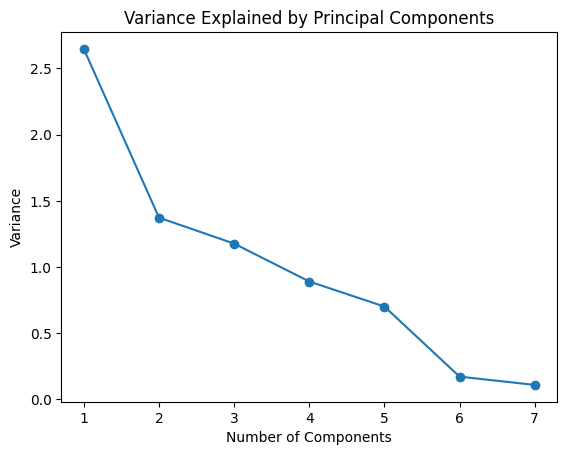

In [9]:
plt.plot(np.arange(1, full_pca.n_components_ + 1), full_pca.explained_variance_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Variance Explained by Principal Components')
plt.show()


Nous voulons utiliser que les deus prémieres composantes parce que sont les composantes le splus forts pour les prédictions aussi pour motifs academiques, est possible de choisir plus des composantes.

In [10]:
from sklearn.decomposition import PCA

partial_pca = PCA(n_components=2, svd_solver='full')
df_pca = partial_pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=['F1', 'F2'])
df_pca.head()

,F1,F2
0,-0.516114,-1.030670
1,0.031314,-0.444903
2,1.392829,-0.266363
3,-1.061051,-0.938873
4,1.382233,0.131638


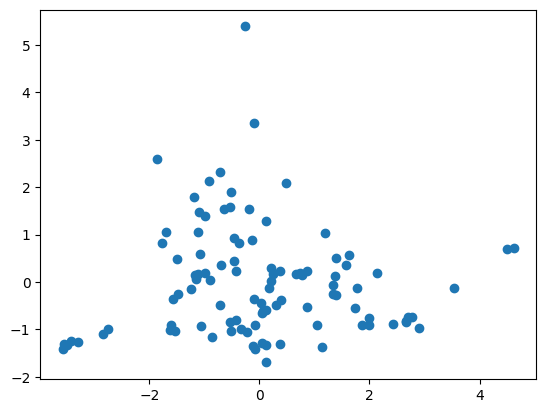

In [11]:
plt.scatter(df_pca['F1'], df_pca['F2'])

<Axes: xlabel='F1', ylabel='F2'>

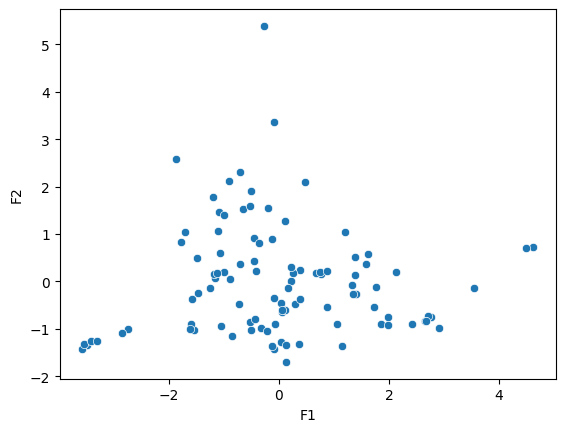

In [12]:
import seaborn as sns
sns.scatterplot(x='F1', y='F2', data=df_pca)




In [13]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=0) 
km.fit(df_pca)


KMeans(n_clusters=3, random_state=0)

Get unique values by cluster and quantity by group.

In [14]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([50, 30, 20]))

<Axes: xlabel='F1', ylabel='F2'>

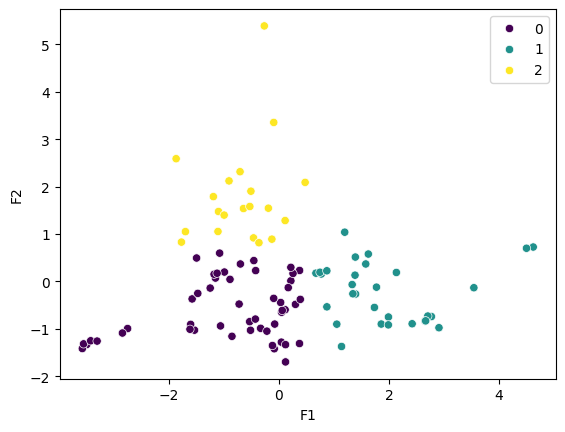

In [15]:
sns.scatterplot(x='F1', y='F2', hue=km.labels_, data=df_pca, palette='viridis')

<Axes: xlabel='F1', ylabel='F2'>

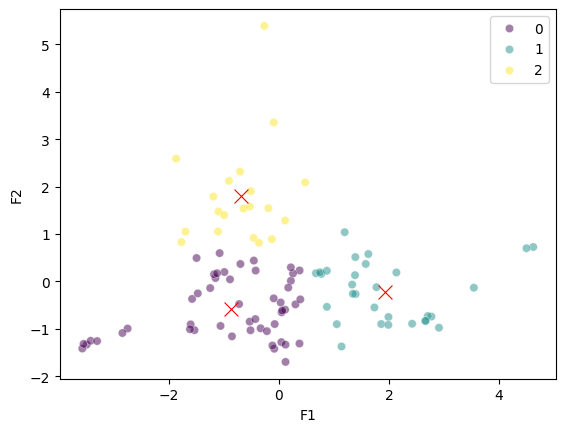

In [16]:
#Getting centers of clusters
centers = km.cluster_centers_

sns.scatterplot(x='F1', y='F2', hue=km.labels_, data=df_pca, palette='viridis', alpha=0.5)
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], color='red', s=100, marker='x')

# Suplementary individuals

In [17]:
df_supl_indiv = pd.read_excel('data/alcools.xlsx', sheet_name='indiv supplementaires')

In [18]:
df_supl_indiv.head()

,MEOH,ACET,BU1,ISOP,MEPR,PRO1,ACAL
0,1154,203,15,123,56,50,14
1,923,296,18,112,30,173,5
2,1087,269,16,74,29,597,10


In [19]:
full_pca.transform(df_supl_indiv)
coords = scl.transform(df_supl_indiv)
df_pca_coords = partial_pca.fit_transform(coords)
df_pca_supl = pd.DataFrame(df_pca, columns=['F1', 'F2'])
df_pca_supl


/Users/halcolo/.pyenv/versions/3.10.13/envs/clustering/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,F1,F2
0,-0.516114,-1.030670
1,0.031314,-0.444903
2,1.392829,-0.266363
3,-1.061051,-0.938873
4,1.382233,0.131638
...,...,...
95,1.772031,-0.121248
96,2.665360,-0.831810
97,0.119942,-1.334084
98,-1.123406,0.172404


/var/folders/fj/25hghm0n7n33b98vlpmy81dm0000gn/T/ipykernel_54614/1152205018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='F1', y='F2', data=df_pca_supl,palette=['black'])


<Axes: xlabel='F1', ylabel='F2'>

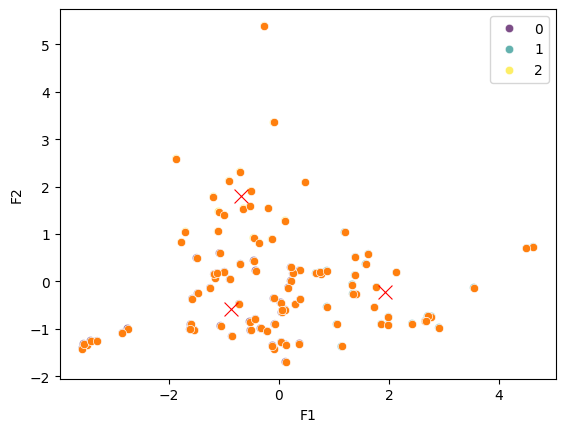

In [28]:
sns.scatterplot(x='F1', y='F2', hue=km.labels_, data=df_pca, palette='viridis', alpha=0.7)
sns.scatterplot(x='F1', y='F2', data=df_pca_supl,palette=['black'])
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], color='red', s=100, marker='x')

In [21]:
df_supl_indiv_pca.head()

NameError: name 'df_supl_indiv_pca' is not defined

# derfining a pipeline

In [ ]:
from sklearn.pipeline import Pipeline
pipe_wkf = Pipeline([('scaler', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('kmeans', KMeans(n_clusters=3, random_state=0))])


In [ ]:
grp_pipe = pipe_wkf.fit(df)
print(np.unique(grp_pipe.named_steps['kmeans'].labels_, return_counts=True))

In [ ]:
centers_pipe = grp_pipe.named_steps['kmeans'].cluster_centers_
data_scaled_pipe = grp_pipe.named_steps['scaler'].transform(df_supl_indiv)

In [ ]:
data_scaled_pipe